In [1]:
# !pip install tensorflow
!pip install tensorflow[and-cuda]
!pip install matplotlib

In [2]:
import tensorflow as tf
import os

2024-09-27 21:07:55.454842: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-27 21:07:55.465649: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-27 21:07:55.468861: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-27 21:07:55.476876: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-27 21:07:56.135424: W tensorflow/compiler/tf2

In [3]:
# from tensorflow.keras import mixed_precision
# mixed_precision.set_global_policy('mixed_float16')

In [4]:
# gpus = tf.config.experimental.list_physical_devices('GPU')

# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#     except RuntimeError as e:
#         print(e)

In [5]:
image_dir = os.path.join("../data", "imagenet_224")

In [6]:
class_names = os.listdir(image_dir)
num_classes = len(class_names)
image_height = 224
image_width = 224
image_size = (image_height, image_width)
batch_size = 128

In [7]:
training_set = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)

validation_set = tf.keras.utils.image_dataset_from_directory(
    image_dir,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=image_size,
    batch_size=batch_size)


Found 14738 files belonging to 10 classes.
Using 10317 files for training.


I0000 00:00:1727496483.736156   84512 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727496483.752279   84512 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727496483.752318   84512 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727496483.754765   84512 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727496483.754810   84512 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 14738 files belonging to 10 classes.
Using 2947 files for validation.


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

training_set = training_set.cache().prefetch(buffer_size=AUTOTUNE)
validation_set = validation_set.cache().prefetch(buffer_size=AUTOTUNE)     

In [9]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [10]:
input = Input(shape=(image_height, image_width, 3))

x = Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(input)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(x)
x = MaxPool2D(pool_size=2, strides=2)(x)
x = Dropout(0.4)(x)
x = Flatten()(x)
x = Dense(units=128, activation="relu")(x)

output = Dense(units=num_classes, activation="softmax")(x)

model = Model(input, output)

print(model.summary())



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,856,618 (49.04 MB)

 Trainable params: 12,856,618 (49.04 MB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[
                  CategoricalAccuracy(),
                  TopKCategoricalAccuracy()
              ])

In [12]:
%%time

epochs = 30
history = model.fit(training_set, validation_data=validation_set, epochs=epochs)

Epoch 1/30


I0000 00:00:1727496492.984205   84672 service.cc:146] XLA service 0x7f8a2800a8d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727496492.984242   84672 service.cc:154]   StreamExecutor device (0): Quadro P2000, Compute Capability 6.1
2024-09-27 21:08:13.008504: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-27 21:08:13.169994: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-09-27 21:08:23.907230: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[128,32,112,112]{3,2,1,0}, f32[128,32,112,112]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[]

 1/81 ━━━━━━━━━━━━━━━━━━━━ 18:50 14s/step - categorical_accuracy: 0.1094 - loss: 63.1365 - top_k_categorical_accuracy: 0.4375

I0000 00:00:1727496506.009105   84672 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/81 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - categorical_accuracy: 0.1517 - loss: 219.8128 - top_k_categorical_accuracy: 0.6661

2024-09-27 21:08:49.102856: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[77,32,112,112]{3,2,1,0}, f32[77,32,112,112]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-09-27 21:08:49.174842: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.07209915s
Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[77,32,112,112]{3,2,1,0}, f32[77,32,112,112]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step - categorical_accuracy: 0.1520 - loss: 217.8842 - top_k_categorical_accuracy: 0.6660

2024-09-27 21:08:53.549615: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.90GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-09-27 21:08:53.549680: W external/local_tsl/tsl/framework/bfc_allocator.cc:291] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.03GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


81/81 ━━━━━━━━━━━━━━━━━━━━ 45s 388ms/step - categorical_accuracy: 0.1524 - loss: 216.0026 - top_k_categorical_accuracy: 0.6660 - val_categorical_accuracy: 0.2290 - val_loss: 2.0949 - val_top_k_categorical_accuracy: 0.7472
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - categorical_accuracy: 0.2984 - loss: 1.9323 - top_k_categorical_accuracy: 0.8046 - val_categorical_accuracy: 0.2759 - val_loss: 2.0933 - val_top_k_categorical_accuracy: 0.7910
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - categorical_accuracy: 0.4650 - loss: 1.5165 - top_k_categorical_accuracy: 0.8869 - val_categorical_accuracy: 0.2521 - val_loss: 2.2718 - val_top_k_categorical_accuracy: 0.7740
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - categorical_accuracy: 0.5784 - loss: 1.2172 - top_k_categorical_accuracy: 0.9187 - val_categorical_accuracy: 0.2657 - val_loss: 2.7343 - val_top_k_categorical_accuracy: 0.7740
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - categorical_accuracy: 0.6309 -

In [13]:
import pickle

with open(os.path.join("../data", "history_control.pkl"), "wb") as file:
    pickle.dump(history, file)

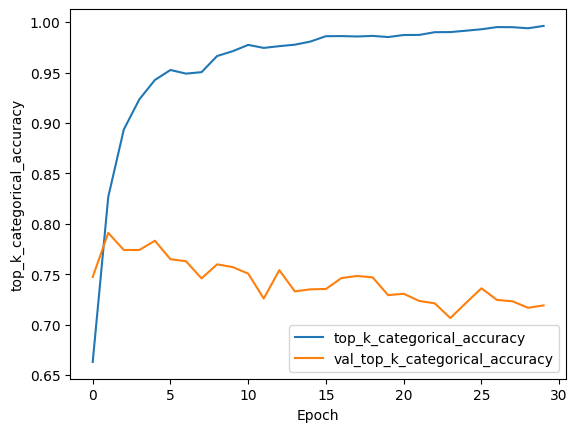

In [15]:
import matplotlib.pyplot as plt

def plot_accuracy_curve(training_result, metric):
    val_metric = f"val_{metric}"
    train_perf = training_result.history[metric]
    validation_perf = training_result.history[val_metric]
    
    plt.plot(train_perf, label=metric)
    plt.plot(validation_perf, label=val_metric)
    
    max_val = max(validation_perf)
    max_val_epoch = validation_perf.index(max_val)
    
    plt.xlabel("Epoch")
    plt.ylabel(metric)
    plt.legend(loc="lower right")
    
plot_accuracy_curve(history, "categorical_accuracy")
# plot_accuracy_curve(history, "top_k_categorical_accuracy")
# plot_accuracy_curve(history, "loss")